# Time Series Forecasting for Car Dealership Financial Planning  
### My First Project in 

This notebook is my **time series forecasting project**.  
I have completed the **intermediate of AI & ML**, and this project applies those fundamentals to a **real-world dataset** from a car dealership.  

Key goals of this project:
- Practice **data cleaning, preprocessing, and KPI categorization**
- Train **time series models (Exponential Smoothing)** for financial and driver KPIs
- Build a **goal-seeking financial planning tool** that helps managers plan actions to hit profit targets
- Create visualizations to clearly show **baseline forecasts vs. adjusted financial plans**


# KPI Relationships

C:\Users\bhuti\AppData\Local\Temp\ipykernel_24692\4245201966.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorized['category'].fillna('Other', inplace=True)


Data has been cleaned and categorized.
Generating multiple KPI relationship plots...
Visualization complete. Chart saved as 'multi_kpi_relationship_plot.png'.


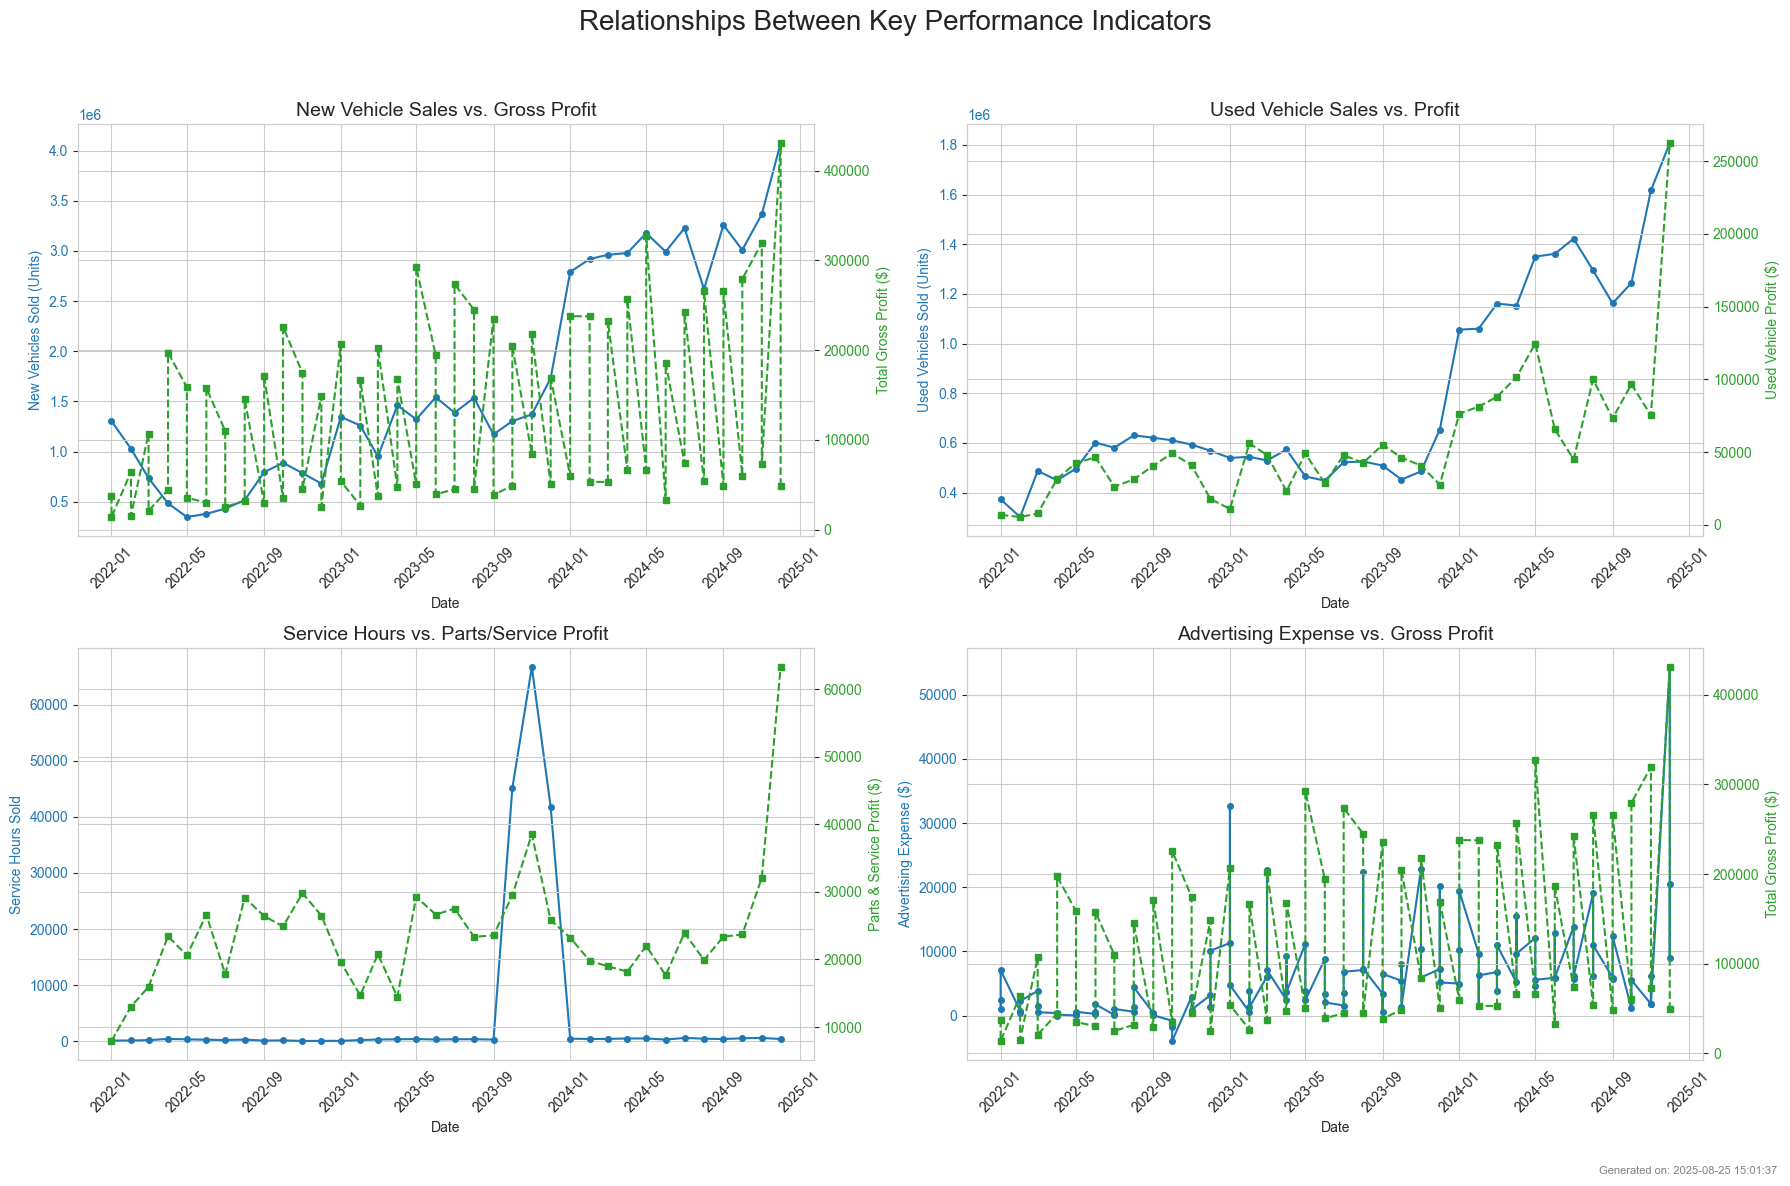

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Cleaning and Categorization ---

# Load the primary dataset and the category lookup file
df = pd.read_csv('FS-data-80475.csv')
df_lookup = pd.read_csv('categorized_kpis.csv')

# Remove rows where 'english_name' is missing
df.dropna(subset=['english_name'], inplace=True)

# Convert value columns to a numeric format, filling errors with 0
for col in ['monthly_value', 'yearly_value']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Merge to add the category column from the lookup file
df_categorized = pd.merge(df, df_lookup, on='english_name', how='left')
df_categorized['category'].fillna('Other', inplace=True)

# Create a proper date column for time-series analysis
df_categorized['date'] = pd.to_datetime(df_categorized['year'].astype(str) + '-' + df_categorized['month'].astype(str))

print("Data has been cleaned and categorized.")

#  Create Multiple Relationship Plots ---

# Define the pairs of KPIs we want to visualize
kpi_pairs = {
    'New_Vehicles_vs_Profit': {
        'left_kpi': 'TOTAL NEW VEHICLES\n(LINES 21 THRU 25)',
        'right_kpi': 'TOTAL GROSS PROFIT',
        'left_label': 'New Vehicles Sold (Units)',
        'right_label': 'Total Gross Profit ($)',
        'title': 'New Vehicle Sales vs. Gross Profit'
    },
    'Used_Vehicles_vs_Profit': {
        'left_kpi': 'TOTAL USED VEHICLES\n(LINES 27 \nTHRU 29)',
        'right_kpi': 'TOTAL GROSS PROFIT - USED VEHICLE DEPT.',
        'left_label': 'Used Vehicles Sold (Units)',
        'right_label': 'Used Vehicle Profit ($)',
        'title': 'Used Vehicle Sales vs. Profit'
    },
    'Service_Hours_vs_Profit': {
        'left_kpi': 'Hours Sold',
        'right_kpi': 'TOTAL GROSS PROFIT - PARTS & ACCESS DEPT.',
        'left_label': 'Service Hours Sold',
        'right_label': 'Parts & Service Profit ($)',
        'title': 'Service Hours vs. Parts/Service Profit'
    },
    'Advertising_vs_Sales': {
        'left_kpi': 'Advertising (Institutional)',
        'right_kpi': 'TOTAL GROSS PROFIT',
        'left_label': 'Advertising Expense ($)',
        'right_label': 'Total Gross Profit ($)',
        'title': 'Advertising Expense vs. Gross Profit'
    }
}


fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten() 
sns.set_style("whitegrid")

print("Generating multiple KPI relationship plots...")

for i, (pair_name, config) in enumerate(kpi_pairs.items()):
    ax1 = axes[i]
 
    df_left = df_categorized[df_categorized['english_name'] == config['left_kpi']].sort_values('date')
    df_right = df_categorized[df_categorized['english_name'] == config['right_kpi']].sort_values('date')

  
    color = 'tab:blue'
    ax1.set_xlabel('Date', fontsize=10)
    ax1.set_ylabel(config['left_label'], color=color, fontsize=10)
    ax1.plot(df_left['date'], df_left['monthly_value'], color=color, marker='o', markersize=4)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation=45)

    # Create the second y-axis
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel(config['right_label'], color=color, fontsize=10)
    ax2.plot(df_right['date'], df_right['monthly_value'], color=color, marker='s', markersize=4, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax1.set_title(config['title'], fontsize=14)


fig.suptitle('Relationships Between Key Performance Indicators', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 

timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
plt.figtext(0.99, 0.01, f'Generated on: {timestamp}', horizontalalignment='right', fontsize=8, color='gray')

output_filename = 'multi_kpi_relationship_plot.png'
plt.savefig(output_filename)

print(f"Visualization complete. Chart saved as '{output_filename}'.")


# KPI Relationships

- New Vehicle Sales vs Gross Profit: Sales increase, but profit grows slower → margins shrinking.

- Used Vehicle Sales vs Profit: Strong upward link; profit rises with sales.

- Service Hours vs Parts/Service Profit: Weak relation, sometimes spikes (likely repairs linked to recalls or seasonal events).

- Advertising vs Profit: Ads spend is high but profit doesn’t scale equally 

# Dealership Performance Dashboard



Generating visualization dashboard...
Dashboard saved as 'dealership_dashboard.png'.


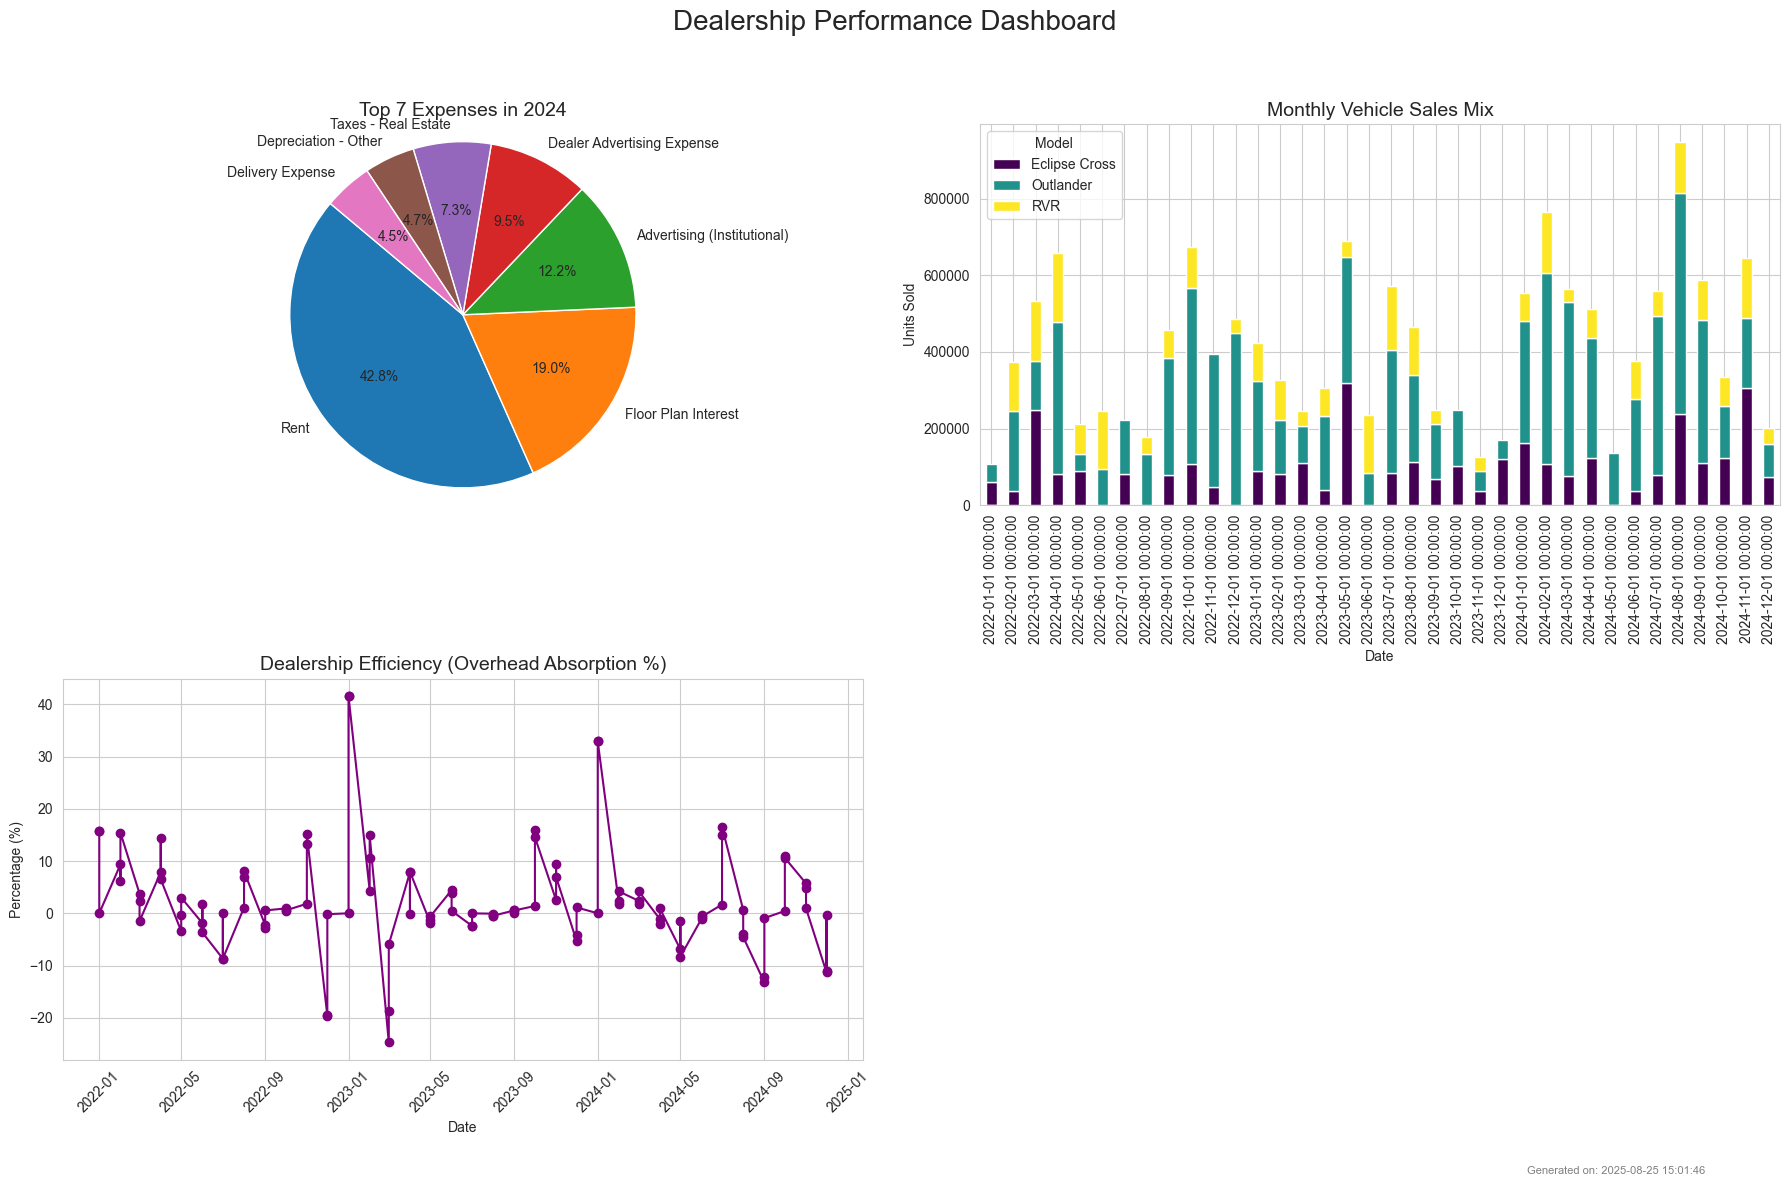

In [41]:


print("Generating visualization dashboard...")
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))


ax1 = axes[0, 0]

df_expenses = df_categorized[(df_categorized['category'] == 'Currency:Expense') & (df_categorized['year'] == 2024)]

expense_totals = df_expenses.groupby('english_name')['monthly_value'].sum().nlargest(7) # Get top 7 expenses

ax1.pie(expense_totals, labels=expense_totals.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Top 7 Expenses in 2024', fontsize=14)
ax1.axis('equal')  

ax2 = axes[0, 1]
vehicle_models = ['Outlander', 'Eclipse Cross', 'RVR', 'Mirage']
df_vehicles = df_categorized[df_categorized['english_name'].isin(vehicle_models)]

df_pivot = df_vehicles.pivot_table(index='date', columns='english_name', values='monthly_value', aggfunc='sum').fillna(0)

df_pivot.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
ax2.set_title('Monthly Vehicle Sales Mix', fontsize=14)
ax2.set_ylabel('Units Sold')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=90)
ax2.legend(title='Model')


ax3 = axes[1, 0]
ratio_kpi = 'Overhead Absorption %'
df_ratio = df_categorized[df_categorized['english_name'] == ratio_kpi].sort_values('date')

ax3.plot(df_ratio['date'], df_ratio['monthly_value'], marker='o', linestyle='-', color='purple')
ax3.set_title('Dealership Efficiency (Overhead Absorption %)', fontsize=14)
ax3.set_ylabel('Percentage (%)')
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=45)


axes[1, 1].set_visible(False)

fig.suptitle('Dealership Performance Dashboard', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
plt.figtext(0.95, 0.01, f'Generated on: {timestamp}', horizontalalignment='right', fontsize=8, color='gray')

output_filename = 'dealership_dashboard.png'
plt.savefig(output_filename)

print(f"Dashboard saved as '{output_filename}'.")


# Dealership Performance Dashboard

- ***Expenses*** (2024): Rent (43%) + Floor Plan Interest (19%) dominate costs.

- ***Sales Mix***: Outlander model dominates, Eclipse Cross is weaker. Sales fluctuate heavily month-to-month.

- ***Overhead Absorption***: Efficiency is unstable, often negative  fixed overheads aren’t being covered consistently.

- ***Takeaway***: The dealership is cost-heavy (rent + financing), and efficiency is unstable. Sales volatility worsens this problem.

# Correlation Heatmap – Operational KPIs




Aggregating data by financial category...

--- Correlation Matrix ---
This table shows the correlation score between each pair of KPIs.
A score near +1.0 means they strongly move together.
category                       Currency:Expense  \
category                                          
Currency:Expense                       1.000000   
Currency:Payroll/Compensation          0.252715   
Currency:Revenue/Sales                -0.164479   
Currency:Warranty                      0.292045   

category                       Currency:Payroll/Compensation  \
category                                                       
Currency:Expense                                    0.252715   
Currency:Payroll/Compensation                       1.000000   
Currency:Revenue/Sales                              0.128536   
Currency:Warranty                                   0.089354   

category                       Currency:Revenue/Sales  Currency:Warranty  
category                                    

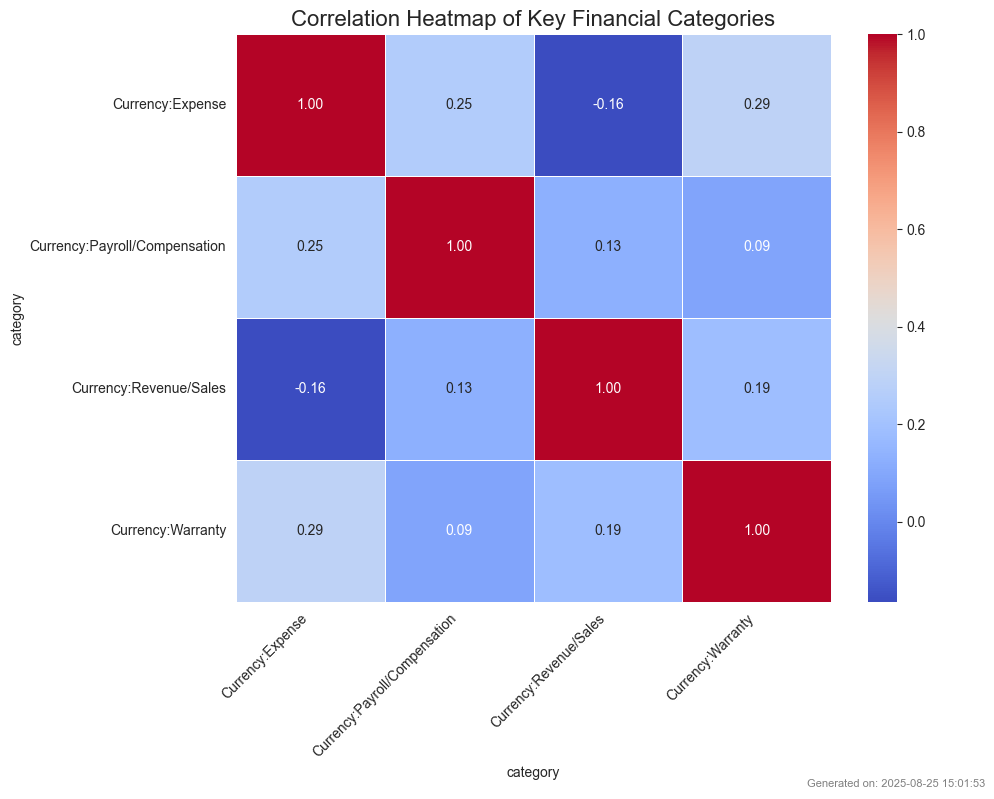

In [43]:

print("Aggregating data by financial category...")

categories_for_corr = [
    'Currency:Revenue/Sales',
    'Currency:Expense',
    'Currency:Payroll/Compensation',
    'Currency:Warranty'
]
df_financials = df_categorized[df_categorized['category'].isin(categories_for_corr)]
df_aggregated = df_financials.groupby(['date', 'category'])['monthly_value'].sum().reset_index()


df_pivot = df_aggregated.pivot_table(index='date', columns='category', values='monthly_value').fillna(0)


print("\n--- Correlation Matrix ---")

correlation_matrix = df_pivot.corr()
print("This table shows the correlation score between each pair of KPIs.")
print("A score near +1.0 means they strongly move together.")
print(correlation_matrix)


print("\nGenerating heatmap visualization...")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt=".2f",          
    linewidths=.5
)

plt.title('Correlation Heatmap of Key Financial Categories', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
plt.figtext(0.99, 0.01, f'Generated on: {timestamp}', horizontalalignment='right', fontsize=8, color='gray')


output_filename = 'final_correlation_heatmap.png'
plt.savefig(output_filename)

print(f"Heatmap saved as '{output_filename}'.")


# Correlation Heatmap – Operational KPIs

- ***Strong correlations:***

- ***Used Vehicles*** ↔ ***Used Vehicle Profit*** (0.78) → Selling more used vehicles strongly boosts profit.

- ***New Vehicles*** ↔ ***Used Vehicles*** (0.91) → Sales movements are related across new and used cars.

- ***Parts & Accessories*** ↔ ***Used Vehicles*** (0.63) → More used vehicle sales often increase parts sales (repairs, add-ons).

- ***Weak/negative correlations:***

- ***Hours Sold vs New Vehicle Profit*** (-0.18) → Service hours aren’t directly driving new car sales.

 ***Takeaway:*** Used vehicles are the strongest driver of profit. Service and new vehicle sales don’t scale profitably in the same way.

# Correlation Heatmap – Financial Categories



Step 3: Generating correlation matrix and heatmap...

--- Correlation Matrix of Specific KPIs ---
english_name                               Hours Sold  \
english_name                                            
Hours Sold                                   1.000000   
TOTAL GROSS PROFIT - NEW VEHICLE DEPT.      -0.176455   
TOTAL GROSS PROFIT - PARTS & ACCESS DEPT.    0.283294   
TOTAL GROSS PROFIT - USED VEHICLE DEPT.     -0.107041   
TOTAL NEW VEHICLES\n(LINES 21 THRU 25)      -0.070298   
TOTAL USED VEHICLES\n(LINES 27 \nTHRU 29)   -0.189199   

english_name                               TOTAL GROSS PROFIT - NEW VEHICLE DEPT.  \
english_name                                                                        
Hours Sold                                                              -0.176455   
TOTAL GROSS PROFIT - NEW VEHICLE DEPT.                                   1.000000   
TOTAL GROSS PROFIT - PARTS & ACCESS DEPT.                                0.137837   
TOTAL GROSS PROFIT 

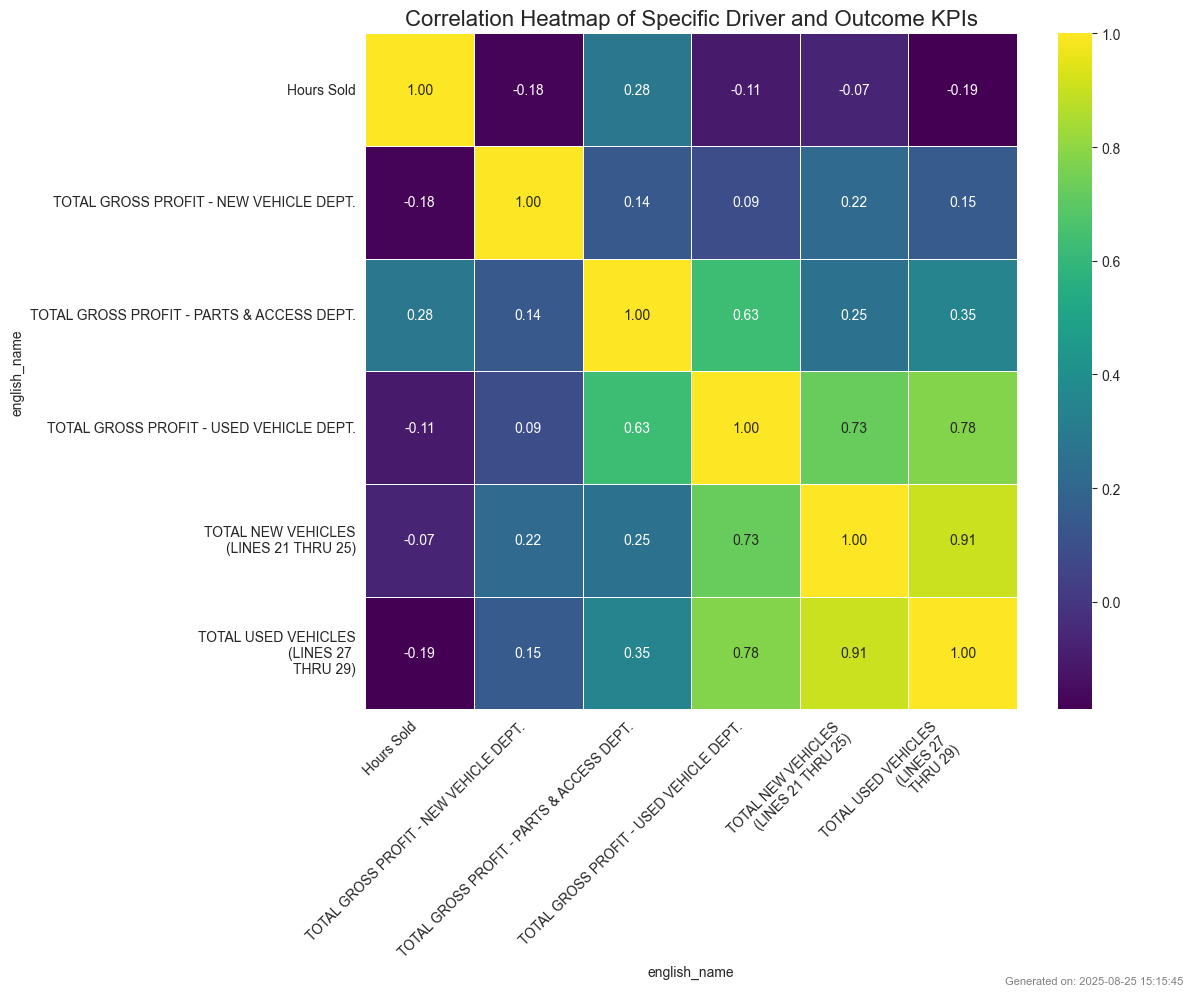

In [48]:

def main():

    # Define the specific, strongly-related KPIs we want to analyze
    kpi_list = [
        'TOTAL NEW VEHICLES\n(LINES 21 THRU 25)',
        'TOTAL GROSS PROFIT - NEW VEHICLE DEPT.',
        'TOTAL USED VEHICLES\n(LINES 27 \nTHRU 29)',
        'TOTAL GROSS PROFIT - USED VEHICLE DEPT.',
        'Hours Sold',
        'TOTAL GROSS PROFIT - PARTS & ACCESS DEPT.'
    ]
    
    df_specific = df_categorized[df_categorized['english_name'].isin(kpi_list)]

    df_pivot = df_specific.pivot_table(index='date', columns='english_name', values='monthly_value').fillna(0)
    
   
    print("\nStep 3: Generating correlation matrix and heatmap...")
    
    
    correlation_matrix = df_pivot.corr()
    
    print("\n--- Correlation Matrix of Specific KPIs ---")
    print(correlation_matrix)

   
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='viridis', # A color-blind friendly palette
        fmt=".2f",
        linewidths=.5
    )

    plt.title('Correlation Heatmap of Specific Driver and Outcome KPIs', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

  
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    plt.figtext(0.99, 0.01, f'Generated on: {timestamp}', horizontalalignment='right', fontsize=8, color='gray')

    output_filename = 'specific_kpi_correlation_heatmap.png'
    plt.savefig(output_filename)
    print(f"\nHeatmap saved as '{output_filename}'.")

if __name__ == '__main__':
    main()


# Corelation
- ***Expenses*** and ***payroll*** are moderately correlated (0.25) → payroll is a cost driver.

- ***Warranty*** expenses slightly rise with sales (0.20 correlation).`m

- ***Revenue*** has a weak correlation with costs (0.14–0.20).

- ***Takeaway***: Costs are not scaling linearly with revenue. This is a warning sign: when revenue goes up, costs still rise too much, cutting into profits.